In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('Admission_Predict (2).csv')

In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df.shape


(500, 9)

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df['Chance of Admit '] = [1 if each > 0.75 else 0 for each in df['Chance of Admit ']]
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [7]:
x=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

In [8]:
x


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [9]:
y

0      1
1      1
2      0
3      1
4      0
      ..
495    1
496    1
497    1
498    0
499    1
Name: Chance of Admit , Length: 500, dtype: int64

In [10]:
y=y.dtype('int')

TypeError: 'numpy.dtypes.Int64DType' object is not callable

In [11]:
y=y.astype('int')

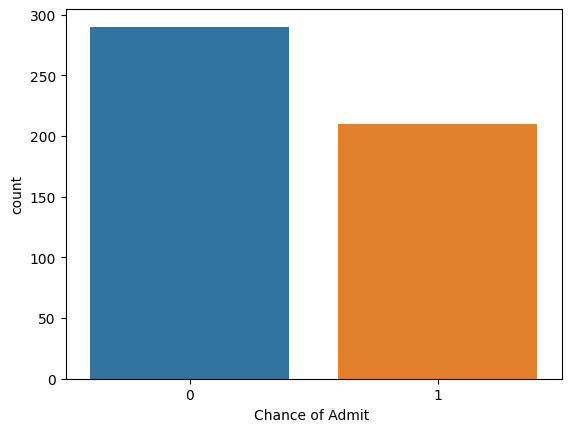

In [12]:
sns.countplot(x=y);

In [14]:
y.value_counts()

Chance of Admit 
0    290
1    210
Name: count, dtype: int64

In [15]:
#cross validation
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [16]:
x_train.shape

(375, 8)

In [17]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
90,91,318,106,2,4.0,4.0,7.92,1
254,255,321,114,4,4.0,5.0,9.12,0
283,284,321,111,3,2.5,3.0,8.90,1
445,446,328,116,5,4.5,5.0,9.08,1
461,462,301,102,3,2.5,2.0,8.13,1
...,...,...,...,...,...,...,...,...
430,431,311,104,3,4.0,3.5,8.13,1
49,50,327,111,4,3.0,4.0,8.40,1
134,135,333,113,5,4.0,4.0,9.28,1
365,366,330,114,4,4.5,3.0,9.17,1


In [18]:
x_test.shape

(125, 8)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
classifier=DecisionTreeClassifier(random_state=0)



In [27]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
y_pred = classifier.predict(x_test)

In [29]:
result = pd.DataFrame({
    'actual':y_test,
'predicted':y_pred
})

In [30]:
result

,actual,predicted
90,0,0
254,1,1
283,1,1
445,1,1
461,0,0
...,...,...
430,0,0
49,1,0
134,1,1
365,1,1


In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

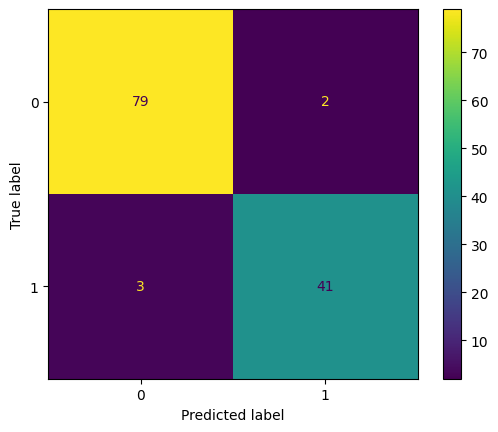

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [34]:
accuracy_score(y_test,y_pred)

0.96

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        81
           1       0.95      0.93      0.94        44

    accuracy                           0.96       125
   macro avg       0.96      0.95      0.96       125
weighted avg       0.96      0.96      0.96       125



In [39]:
# get admission or not

new = [[135,333,113,5,4.0,4.0,9.28,1]]

In [40]:
classifier.predict(new)[0]

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1